## kaggle Breast Cancer Wisconsin (Diagnostic) Data Set

Description: 
I'm a data scientist in biotech specialized in computational genetics. I've been working with sequencing data to understand correlation between genotype (genes) and phenotype (diseases). I'm also interested in medical data. This is a Kaggle dataset on breast cancer with goals to predict if the cancer is benign or malignant. It's interesting because one promising application of ML is in medicine, for example, to assist doctors on diagnosis like IMB Watson.  
Data:  
[breast cancer prediction](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)  
The data is of 569 samples, with 31 features.  
I used sklearn package for simple ML implementations.  

In [2]:
import pandas as pd
import numpy as np
from time import process_time
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve, GridSearchCV, learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### data processing
I performed EDA to explore the data, there are no missing data. I used preprocessing.scale to scale data as perceptron is sensitive to scaling. I used train_test_split to split data with size ratio 0.2, which is a commonly used value.   

In [3]:
data = pd.read_csv('data/breast_cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [98]:
data.shape

(569, 31)

In [5]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [4]:
dict_type = {'M':1, 'B':0}
data.diagnosis=data.diagnosis.map(dict_type)
y = data.diagnosis.values
x = data.drop(['id','diagnosis'], axis=1)

# perceptron is sensitive to scaling
x = preprocessing.scale(x)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

# only use mean features, which makes biological sense
# features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'smoothness_mean', 'compactness_mean', 
#             'concave points_mean', 'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean'] 

# train_x = train[features]
# train_y = train['diagnosis']
# test_x = test[features]
# test_y = test['diagnosis']

### decision tree (DT), using max_depth and ccp_alpha for pruning

I used DecisionTreeClassifier from the sklearn package. Pre-pruning (early stop tree) and post-pruning (after trained) help to reduce overfitting in decision tree. Tuning hyper-parameter of max_depth min_samples_leaf, and min_samples_split (pre-pruning) and CCP cost-complexity-pruning (post-pruning) are common ways. I plotted test_score and train_score with validation_curve to understand performance of max_depth and ccp_alpha values, found an optimal parameters with GridSearchCV and evaluated time performance. Cross validation help to flag overfitting and tell the model will generalize to a new dataset. I used 3 fold cv, which is a commonly used number. I used learning_curve to determines cross-validated training and test scores for different training set sizes.   

For max_depth, once score reaches 1.00 the model starts to overfit along with increased max_depth values.  
For ccp_alpha, more tree is pruned as ccp value increase so score decreased.  
GridSearchCV yield the best parameter as {'ccp_alpha': 0.016666666666666666, 'max_depth': 6}, which gives accuracy_score of 0.9473684210526315.  
There is stil a big gap between training and cv scores on learning curve, which suggests high variance in the model. It might be reduced with more data and with model of less features/less complexity.   

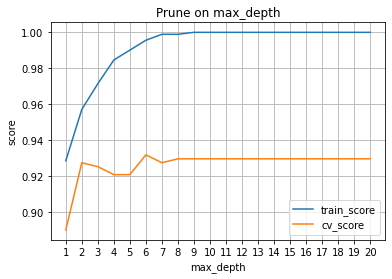

In [128]:
# max_depth

clf_dt = DecisionTreeClassifier(random_state=42)
_range=[i for i in range(1,21)]

train_scores, test_scores = validation_curve(clf_dt, train_x, train_y, param_range=_range, cv=3, param_name='max_depth')
plt.figure()
plt.plot(_range, np.mean(train_scores, axis=1), label='train_score')
plt.plot(_range, np.mean(test_scores, axis=1), label='cv_score')
plt.title("Prune on max_depth")
plt.xlabel("max_depth")
plt.ylabel("score")
plt.xticks(_range)
plt.legend()
plt.grid()

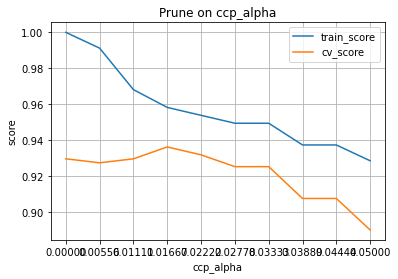

In [129]:
# ccp_alpha

clf_dt = DecisionTreeClassifier(random_state=42)
_range = np.linspace(0,0.05,10)
train_scores, test_scores = validation_curve(clf_dt, train_x, train_y, param_range=_range, cv=3, param_name='ccp_alpha')

plt.figure()
plt.plot(_range, np.mean(train_scores, axis=1), label='train_score')
plt.plot(_range, np.mean(test_scores, axis=1), label='cv_score')
plt.title("Prune on ccp_alpha")
plt.xlabel("ccp_alpha")
plt.ylabel("score")
plt.xticks(_range)
plt.legend()
plt.grid()

In [130]:
# GridSearchCV best parameter

param_grid = {'max_depth': [i for i in range(1,21)], 'ccp_alpha': np.linspace(0,0.05,10)}
gridsearch = GridSearchCV(clf_dt, param_grid=param_grid, cv=3)
gridsearch.fit(train_x, train_y)
print(gridsearch.best_params_)

{'ccp_alpha': 0.016666666666666666, 'max_depth': 6}


In [131]:
# time performance 

for (max_depth, ccp_alpha) in [(6,0.016666666666666666), (3,0.016666666666666666), (6,0.03)]:
    time_start = process_time()
    clf_dt = DecisionTreeClassifier(random_state=42, max_depth=max_depth, ccp_alpha=ccp_alpha)
    clf_dt = clf_dt.fit(train_x, train_y)
    clf_dt.fit(train_x, train_y)
    predict_y = clf_dt.predict(test_x)
    time_end = process_time()
    print(accuracy_score(test_y, predict_y))
    print(time_end-time_start)

0.9473684210526315
0.014353999999912048
0.9473684210526315
0.008774000000016713
0.9122807017543859
0.014129000000025371


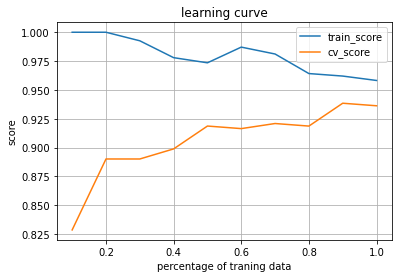

In [132]:
# learning curve

clf_dt = DecisionTreeClassifier(random_state=42, max_depth=6, ccp_alpha=0.016666666666666666)
_range = np.linspace(0.1, 1.0, 10)
x, train_scores, test_scores = learning_curve(clf_dt, train_x, train_y, train_sizes=_range, cv=3)

plt.figure()
plt.plot(_range, np.mean(train_scores, axis=1), label='train_score')
plt.plot(_range, np.mean(test_scores, axis=1), label='cv_score')
plt.title("learning curve")
plt.xlabel("percentage of traning data")
plt.ylabel("score")
plt.legend()
plt.grid()

### neural network (NN)

I used MLPClassifier. Some commonly used hypter-parameters are hidden_layer_sizes, activation, and alpha. I plotted the hyper-parameter hidden_layer_sizes and alpha (Strength of the L2 regularization term) with validation_curve to understand the performance.  
GridSearchCV yield the best parameter as {'alpha': 2.1544346900318843, 'hidden_layer_sizes': (8, 8)} with accuracy 0.9912280701754386, which is very high.  
It takes longer time than DT, but still reasonable for NN, which tend to be long.  
Performance of train and cv scores are close and both high, which suggest NN might be a good model with less bias and variance for this dataset.  
I used loss curve to see how training error decrease with epochs. Training loss decreased as epoch increase and converged, suggesting the model perform well.   

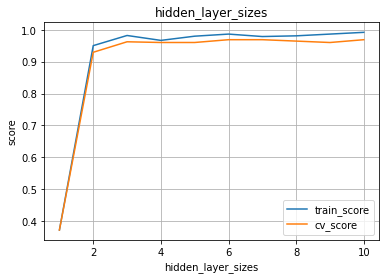

In [133]:
clf_nn = MLPClassifier(random_state=42)
_range = [(i,i) for i in range(1,11)]
train_scores, test_scores = validation_curve(clf_nn, train_x, train_y, param_range=_range, cv=3, param_name='hidden_layer_sizes')

plt.figure()
plt.plot([i for i in range(1,11)], np.mean(train_scores, axis=1), label='train_score')
plt.plot([i for i in range(1,11)], np.mean(test_scores, axis=1), label='cv_score')
plt.title("hidden_layer_sizes")
plt.xlabel("hidden_layer_sizes")
plt.ylabel("score")
plt.legend()
plt.grid()

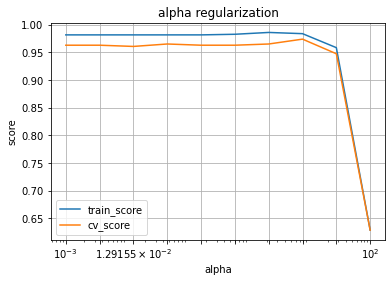

In [134]:
clf_nn = MLPClassifier(random_state=42, hidden_layer_sizes=(3, 3))
_range = np.logspace(-3,2,10)
train_scores, test_scores = validation_curve(clf_nn, train_x, train_y, param_range=_range, cv=3, param_name='alpha')

plt.figure()
plt.semilogx(_range, np.mean(train_scores, axis=1), label='train_score')
plt.semilogx(_range, np.mean(test_scores, axis=1), label='cv_score')
plt.title("alpha regularization")
plt.xlabel("alpha")
plt.ylabel("score")
plt.xticks(_range)
plt.legend()
plt.grid()

In [135]:
param_grid = {'hidden_layer_sizes': [(i,i) for i in range(1,11)], 'alpha':  np.logspace(-3,2,10)}
gridsearch = GridSearchCV(clf_nn, param_grid=param_grid, cv=3)
gridsearch.fit(train_x, train_y)
print(gridsearch.best_params_)

{'alpha': 2.1544346900318843, 'hidden_layer_sizes': (8, 8)}


In [137]:
time_start = process_time()
clf_nn = MLPClassifier(random_state=42, hidden_layer_sizes=(8,8), alpha=2.1544346900318843)
clf_dt = clf_nn.fit(train_x, train_y)
clf_dt.fit(train_x, train_y)
predict_y = clf_nn.predict(test_x)
time_end = process_time()
print(accuracy_score(test_y, predict_y))
print(time_end-time_start)

0.9912280701754386
0.5643609999999626


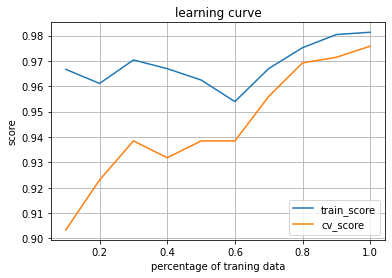

In [140]:
clf_nn = MLPClassifier(random_state=42, hidden_layer_sizes=(8,8), alpha=2.1544346900318843)
_range = np.linspace(0.1, 1.0, 10)
x, train_scores, test_scores = learning_curve(clf_nn, train_x, train_y, train_sizes=_range, cv=3)

plt.figure()
plt.plot(_range, np.mean(train_scores, axis=1), label='train_score')
plt.plot(_range, np.mean(test_scores, axis=1), label='cv_score')
plt.title("learning curve")
plt.xlabel("percentage of traning data")
plt.ylabel("score")
plt.legend()
plt.grid()

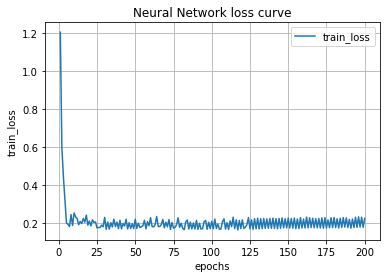

In [10]:
# loss curves

clf_nn = MLPClassifier(random_state=42, hidden_layer_sizes=(8, 8), alpha=2.1544346900318843, learning_rate_init=0.1, max_iter=1, warm_start=True)
epochs = 200
train_lost = np.zeros(epochs)
train_score = np.zeros(epochs)
validation_score = np.zeros(epochs)

_x_train, _x_val, _y_train, _y_val = train_test_split(train_x, train_y, test_size=0.4, random_state=42)
for epoch in range(epochs):
    clf_nn.fit(_x_train, _y_train)
    train_score[epoch] = accuracy_score(_y_train, clf_nn.predict(_x_train))
    validation_score[epoch] = accuracy_score(_y_val, clf_nn.predict(_x_val))
    train_lost[epoch] = clf_nn.loss_
predict_y = clf_nn.predict(test_x)

_range = np.arange(epochs)+1
plt.figure()
plt.plot(_range, train_lost, label='train_loss')
plt.title("Neural Network loss curve")
plt.xlabel("epochs")
plt.ylabel("train_loss")
plt.legend()
plt.grid()

### Boosting
I used ensembl model of AdaBoostClassifier for boosting with varied number of weak leanrs (n_estimators) and learning_rate. GridSearchCV yield {'learning_rate': 1.7782794100389228, 'n_estimators': 801} as the best parameter, with accuracy 0.9736842105263158. This model take longer time than other models, which is expected for AdaBoost. There is big gap on performance between train and cv, suggesting the model is not a good fit for this data.    

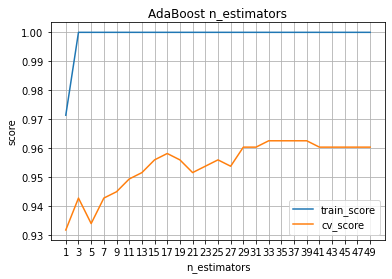

In [22]:
# ensembl, boosting, adaboost

max_depth = 3
clf_adb = AdaBoostClassifier(random_state=42, base_estimator=tree.DecisionTreeClassifier(max_depth=max_depth))
# n_estimators default 50
_range = np.arange(1,50,2)
train_scores, test_scores = validation_curve(clf_adb, train_x, train_y, param_range=_range, cv=3, param_name='n_estimators')
plt.figure()
plt.plot(_range, np.mean(train_scores, axis=1), label='train_score')
plt.plot(_range, np.mean(test_scores, axis=1), label='cv_score')
plt.title("AdaBoost n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("score")
plt.xticks(_range)
plt.legend()
plt.grid()

In [142]:
max_depth = 3
clf_adb = AdaBoostClassifier(random_state=42, base_estimator=tree.DecisionTreeClassifier(max_depth=max_depth))
param_grid = {'n_estimators': np.arange(1,2000,400), 'learning_rate': np.logspace(-2,1,5)}
gridsearch = GridSearchCV(clf_adb, param_grid=param_grid, cv=5)
gridsearch.fit(train_x, train_y)
print(gridsearch.best_params_)

{'learning_rate': 1.7782794100389228, 'n_estimators': 801}


In [144]:
time_start = process_time()
clf_adb = AdaBoostClassifier(random_state=42, learning_rate=gridsearch.best_params_['learning_rate'], n_estimators=gridsearch.best_params_['n_estimators'], base_estimator=tree.DecisionTreeClassifier(max_depth=3))
clf_adb.fit(train_x, train_y)
predict_y = clf_adb.predict(test_x)
time_end = process_time()
print(accuracy_score(test_y, predict_y))
print(time_end-time_start)

0.9736842105263158
1.959043999999949


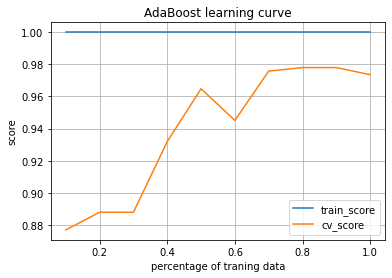

In [25]:
_range = np.linspace(0.1, 1.0, 10)
clf_adb = AdaBoostClassifier(random_state=42, learning_rate=gridsearch.best_params_['learning_rate'], n_estimators=801, base_estimator=tree.DecisionTreeClassifier(max_depth=3))
x, train_scores, test_scores = learning_curve(clf_adb, train_x, train_y, train_sizes=_range, cv=3)
plt.figure()
plt.plot(_range, np.mean(train_scores, axis=1), label='train_score')
plt.plot(_range, np.mean(test_scores, axis=1), label='cv_score')
plt.title("AdaBoost learning curve")
plt.xlabel("percentage of traning data")
plt.ylabel("score")
plt.legend()
plt.grid()

### Support Vector Machines (SVM)

I used SVC and LinearSVC, with varied hypter-parameter C (regularization) and different kernel types. GridSearchCV yield {'C': 1.6681005372000592, 'kernel': 'rbf'} as the best parameter, with accuracy 0.9824561403508771, which is good. SVM is very fast and outperform LinearSVC. Train and cv showed small gap and converge with high score on learning curve, suggesting SVM is a good model for this data.  

In [146]:
_range = np.logspace(-2,2,10)

def set_svm(_range, kernel, probability):
    clf_svm = svm.SVC(probability=probability, random_state=42, kernel=kernel)
    train_scores, test_scores = validation_curve(clf_svm, train_x, train_y, param_range=_range, cv=3, param_name='C')
    plt.figure()
    plt.semilogx(_range, np.mean(train_scores, axis=1), label='train_score')
    plt.semilogx(_range, np.mean(test_scores, axis=1), label='cv_score')
    plt.title("SVM C regularization")
    plt.xlabel("C regularization")
    plt.ylabel("score")
    plt.xticks(_range)
    plt.legend()
    plt.grid()

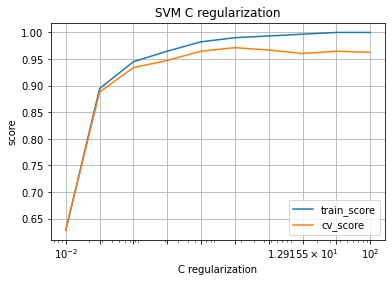

In [147]:
set_svm(_range=_range, kernel='rbf', probability=True)

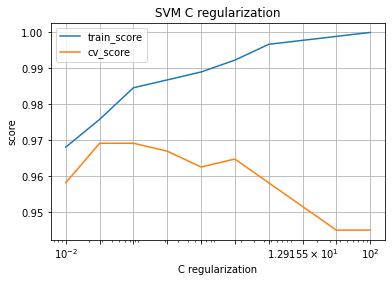

In [148]:
set_svm(_range=_range, kernel='linear', probability=True)

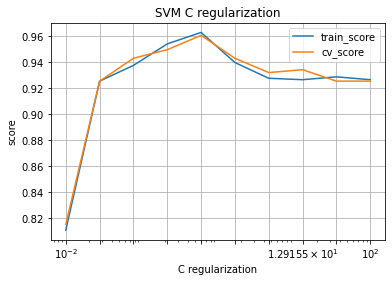

In [149]:
set_svm(_range=_range, kernel='sigmoid', probability=False)

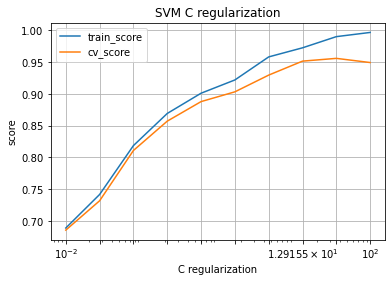

In [150]:
set_svm(_range=_range, kernel='poly', probability=False)

In [151]:
clf_svm = svm.SVC(random_state=42)
param_grid = {'C': np.logspace(-2,2,10), 'kernel': ['linear', 'rbf', 'sigmoid', 'poly']}
gridsearch_svm = GridSearchCV(clf_svm, param_grid=param_grid, cv=3)
gridsearch_svm.fit(train_x, train_y)
print(gridsearch_svm.best_params_)

{'C': 1.6681005372000592, 'kernel': 'rbf'}


In [18]:
time_start = process_time()
clf_svm = svm.SVC(random_state=42, kernel='rbf', C=1.6681005372000592)
clf_svm.fit(train_x, train_y)
predict_y = clf_svm.predict(test_x)
print(accuracy_score(test_y, predict_y))
time_end = process_time()
print(time_end-time_start)

0.9824561403508771
0.01591599999999893


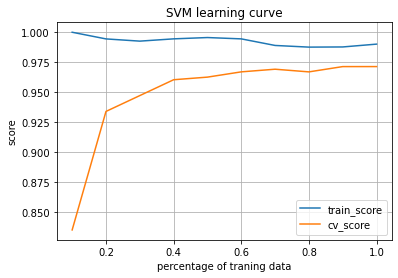

In [19]:
_range = np.linspace(0.1, 1.0, 10)
x, train_scores, test_scores = learning_curve(clf_svm, train_x, train_y, train_sizes=_range, cv=3)
plt.figure()
plt.plot(_range, np.mean(train_scores, axis=1), label='train_score')
plt.plot(_range, np.mean(test_scores, axis=1), label='cv_score')
plt.title("SVM learning curve")
plt.xlabel("percentage of traning data")
plt.ylabel("score")
plt.legend()
plt.grid()

In [152]:
time_start = process_time()
clf_svm = svm.LinearSVC(random_state=42)
clf_svm.fit(train_x, train_y)
predict_y = clf_svm.predict(test_x)
print(accuracy_score(test_y, predict_y))
time_end = process_time()
print(time_end-time_start)

0.956140350877193
0.00847099999987222


### k-nearest neighbors

I used KNeighborsClassifier with various n_neighbors (Number of neighbors to use). As kNN scans the training data and calculate distance between query point and current point, it is very slow for large data set. The metric (default=’minkowski’), n_neighbors and algorithm (default=’auto’) are 3 keys features to determine a kNN method; the more the n_neighbors, the more time it takes.  
GridSearchCV yield the best parameter {'n_neighbors': 7} with accuracy 0.956140350877193. After 7, the more n_neighbors, the more bias in model so both train and cv scores decrease.  
Although train and cv converge in learning curve, they are not very high. It suggest the data might be of high bais and more data is needed to improve the prediction.  

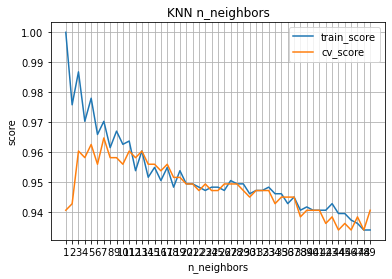

In [158]:
clf_knn = KNeighborsClassifier()
_range = np.arange(1, 50)
train_scores, test_scores = validation_curve(clf_knn, train_x, train_y, param_range=_range, cv=3, param_name='n_neighbors')

plt.figure()
plt.plot(_range, np.mean(train_scores, axis=1), label='train_score')
plt.plot(_range, np.mean(test_scores, axis=1), label='cv_score')
plt.title("KNN n_neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.xticks(_range)
plt.legend()
plt.grid()

In [159]:
param_grid = {'n_neighbors': _range}
gridsearch_svm = GridSearchCV(clf_knn, param_grid=param_grid, cv=3)
gridsearch_svm.fit(train_x, train_y)
print(gridsearch_svm.best_params_)

{'n_neighbors': 7}


In [15]:
for i in range(6,9,1):
    time_start = process_time()
    clf_knn = KNeighborsClassifier(n_neighbors=i)
    clf_knn = clf_knn.fit(train_x, train_y)
    predict_y = clf_knn.predict(test_x)
    time_end = process_time()
    print(accuracy_score(test_y, predict_y))
    print(time_end-time_start)

0.956140350877193
0.007281000000000759
0.9473684210526315
0.00852300000000028
0.956140350877193
0.010509000000000768


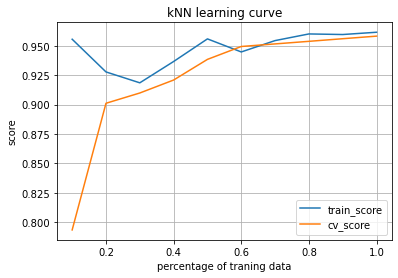

In [20]:
_range = np.linspace(0.1, 1.0, 10)
KNeighborsClassifier(n_neighbors=7)
x, train_scores, test_scores = learning_curve(clf_knn, train_x, train_y, train_sizes=_range, cv=3)
plt.figure()
plt.plot(_range, np.mean(train_scores, axis=1), label='train_score')
plt.plot(_range, np.mean(test_scores, axis=1), label='cv_score')
plt.title("kNN learning curve")
plt.xlabel("percentage of traning data")
plt.ylabel("score")
plt.legend()
plt.grid()

### summary 

As general description, I set random_state=42（The Hitchhiker's Guide to the Galaxy）for reproducibility. I used preprocessing.scale to scale data, as perceptron is sensitive to scaling. This has actually improved accuracy performance. It might be better to use MinMaxScaler. I first tried to select some features based on biological meaning, but the results is not as good as using all features. Some further feature engineering (get volume from radius etc.) might help to further improve the performance.     

* Performance on time    
DT=0.014353999999912048  
NN=0.5643609999999626  
AdaBoost=1.959043999999949  
SVM=0.01591599999999893    
kNN=0.00852300000000028

The training time various depend on hyper-parameters and data size. This data is with less than 600 samples, not big and with possible high variance and bias. Based on the values used in this experiment, SVM, DT, and kNN are relatively fast, while NN and boosting are slow. For DT, I applied pruning which reduces complexity hence saved time. kNN does not have model and the time complexity is O(nd), n is the total number of data-points in the training data and d is the total number of features in the dataset, so it is not optimal for large dataset. It does not generalize over data but scans the training data and calculate distance between query point and current point. As this data is not big, kNN run fast. Boosting is usually slow, as time depends on the runtime of weak learner used. But in this case, it is actually not too slow. SVM is usually fast, as it uses quadratic optimization. For NN, time cost is usually high as it takes backpropagation for gradient computation. But this case it is reasonable, possibly because I used small layer with only 8 nodes. 

* Performance on accuracy  
DT=0.9473684210526315  
NN=0.9912280701754386  
AdaBoost=0.9736842105263158  
SVM=0.9824561403508771  
kNN=0.956140350877193  

For this small dataset, NN performed best as expected, DT is the worst, but the accuracy difference is limited. SVM and AdaBoost also performed well. A gap between training and cv scores on learning curve suggests such high variance and bais in the data, thus models could benefit from more data and performance could be improved using model of less features/complexity.  

### conclusion
For this Kaggle breast cancer data, the best performer neural network (NN) can achieve a high accuracy of 0.9912 in predicting tumor benign/malignant. 